# Inspect

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, h5py, math
import numpy as np
import scipy, scipy.ndimage as img
import matplotlib.pyplot as plt
plt.set_cmap("Greys_r")

sys.path.append("..")
from utils.cv_sampler import Sampler
from utils.helpers import rem_margin

In [19]:
GS_PREALIGNED = 'gs://neuroglancer/pinky40_alignment/prealigned'  
GS_ALIGNED = 'gs://neuroglancer/pinky40_v11/image' 

In [25]:
mip = 3
margin = 0.125
sidelen, height = 2**mip * 1024, 100
adj_sidelen = int(sidelen / (1-2*margin))

sampler = Sampler(source=GS_PREALIGNED, mip=mip)

x,y,z = 57343-adj_sidelen, 40959-adj_sidelen, 1000-height
chunk = sampler.chunk_at_global_coords((x,y,z),(x+adj_sidelen,y+adj_sidelen,z+height))
chunk = np.swapaxes(chunk, 0, 2)


Downloading:  28%|██▊       | 1733/6292 [00:18<00:42, 106.03it/s]


Downloading:  58%|█████▊    | 3621/6292 [00:37<00:22, 117.61it/s]


Downloading:  91%|█████████ | 5698/6292 [00:56<00:05, 109.55it/s]


Downloading: 100%|█████████▉| 6289/6292 [01:01<00:00, 109.14it/s]
Downloading: 12578it [01:01, 155.52it/s]                         

Rendering Image: 100%|██████████| 6292/6292 [00:01<00:00, 4410.91it/s]

In [26]:
print(sampler.vol_offsets)
print(sampler.vol_size)
print(2**15)

[10240, 4096, 0]
[57344, 40960, 1008]
32768


In [28]:
chunk.shape

(100, 1365, 1365)

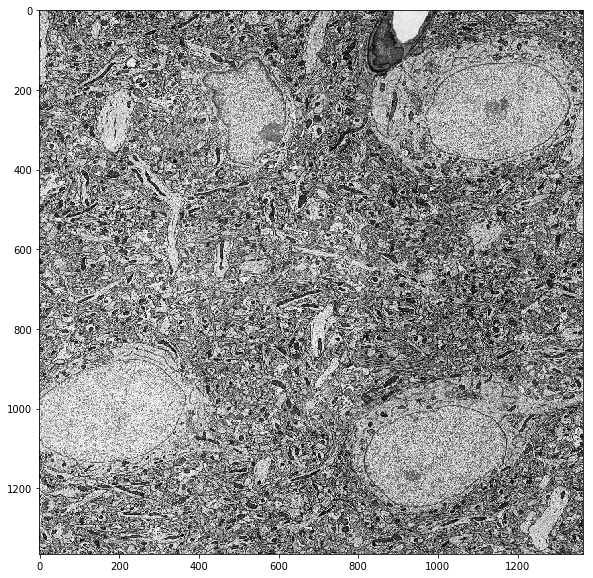

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(chunk[0])
plt.show()

In [23]:
from moviepy.editor import ImageSequenceClip 

filename = 'temp.gif'; fps = 8; scale = 1.0

chunk = chunk[..., np.newaxis] * np.ones(3)   # RGB = 1,1,1

clip = ImageSequenceClip(list(chunk), fps=fps).resize(scale)
clip.write_gif(filename, fps=fps, verbose=False)


 99%|█████████▉| 100/101 [00:33<00:00,  3.02it/s]
